In [2]:
# import libraries:

import pandas as pd;
import numpy as np;
import seaborn as sys;
import matplotlib.pyplot as plt;    

In [3]:
# Import DataSet:

df= pd.read_csv('CarPrice_Assignment.csv')  
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
# looking for Null Values:

df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
# Duplicate Values: 

df.duplicated().sum()

0

In [6]:
#DataTypes:

df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
#Unique Values in CylinderNumber:

df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [8]:
# Converting CylinderNumber to Int:

mapping= {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8 ,'twelve':12}
df['cylindernumber']=df['cylindernumber'].replace(mapping)
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [9]:
# Identify categorical variables

# Select object columns only
object_cols = df.select_dtypes(include='object').columns

# Display categorical variables
object_cols

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [11]:
# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'])
df

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,two,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,two,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,two,front,94.5,171.2,65.5,52.4,2823,...,True,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,four,front,99.8,176.6,66.2,54.3,2337,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,four,front,99.4,176.6,66.4,54.3,2824,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),four,front,109.1,188.8,68.9,55.5,2952,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,volvo 144ea,four,front,109.1,188.8,68.8,55.5,3049,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,volvo 244dl,four,front,109.1,188.8,68.9,55.5,3012,...,True,False,False,False,False,False,False,True,False,False
203,204,-1,volvo 246,four,front,109.1,188.8,68.9,55.5,3217,...,False,False,False,False,False,True,False,False,False,False


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#  label encoding to the 'symboling' column
df['symboling'] = label_encoder.fit_transform(df['symboling'])

df['doornumber'] = label_encoder.fit_transform(df['doornumber'])

df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])

df[['symboling' ,'doornumber','cylindernumber']]

,symboling,doornumber,cylindernumber
0,5,1,2
1,5,1,2
2,3,1,4
3,4,0,2
4,4,0,3
...,...,...,...
200,1,0,2
201,1,0,2
202,1,0,4
203,1,0,4


In [14]:
df

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,5,alfa-romero giulia,1,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
1,2,5,alfa-romero stelvio,1,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
2,3,3,alfa-romero Quadrifoglio,1,front,94.5,171.2,65.5,52.4,2823,...,True,False,False,False,False,False,False,True,False,False
3,4,4,audi 100 ls,0,front,99.8,176.6,66.2,54.3,2337,...,False,False,False,False,False,False,False,True,False,False
4,5,4,audi 100ls,0,front,99.4,176.6,66.4,54.3,2824,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,1,volvo 145e (sw),0,front,109.1,188.8,68.9,55.5,2952,...,False,False,False,False,False,False,False,True,False,False
201,202,1,volvo 144ea,0,front,109.1,188.8,68.8,55.5,3049,...,False,False,False,False,False,False,False,True,False,False
202,203,1,volvo 244dl,0,front,109.1,188.8,68.9,55.5,3012,...,True,False,False,False,False,False,False,True,False,False
203,204,1,volvo 246,0,front,109.1,188.8,68.9,55.5,3217,...,False,False,False,False,False,True,False,False,False,False


In [15]:
#x is the independent and y is the dependent variable
x = df[['symboling', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg',  'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]
y = df['price'] 

In [16]:
# Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [17]:
y_test

104    17199.0
62     10245.0
40     10295.0
124    12764.0
168     9639.0
127    34028.0
156     6938.0
37      7895.0
171    11549.0
118     5572.0
34      7129.0
2      16500.0
174    10698.0
79      7689.0
71     34184.0
201    19045.0
196    15985.0
95      7799.0
15     30760.0
102    14399.0
132    11850.0
32      5399.0
75     16503.0
41     12945.0
129    31400.5
77      6189.0
112    16900.0
99      8949.0
120     6229.0
18      5151.0
28      8921.0
29     12964.0
193    12290.0
31      6855.0
68     28248.0
172    17669.0
123     8921.0
203    22470.0
30      6479.0
91      6649.0
186     8495.0
Name: price, dtype: float64

In [19]:
x_test

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
104,5,1,91.3,170.7,67.9,49.7,3071,4,181,3.43,...,True,False,False,False,False,False,False,True,False,False
62,2,0,98.8,177.8,66.5,55.5,2410,2,122,3.39,...,False,False,False,True,False,False,False,False,False,False
40,2,0,96.5,175.4,62.5,54.1,2372,2,110,3.15,...,False,False,True,False,False,False,False,False,False,False
124,5,1,95.9,173.2,66.3,50.2,2818,2,156,3.59,...,False,False,False,False,False,False,False,False,True,False
168,4,1,98.4,176.2,65.6,52.0,2536,2,146,3.62,...,False,False,False,False,False,False,False,True,False,False
127,5,1,89.5,168.9,65.0,51.6,2756,4,194,3.74,...,False,False,False,False,False,False,False,True,False,False
156,2,0,95.7,166.3,64.4,53.0,2081,2,98,3.19,...,False,False,False,True,False,False,False,False,False,False
37,2,1,96.5,167.5,65.2,53.3,2236,2,110,3.15,...,False,False,True,False,False,False,False,False,False,False
171,4,1,98.4,176.2,65.6,52.0,2714,2,146,3.62,...,False,False,False,False,False,False,False,True,False,False
118,3,1,93.7,157.3,63.8,50.8,1918,2,90,2.97,...,False,False,False,True,False,False,False,False,False,False


In [20]:
x_train

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
7,3,0,105.8,192.7,71.4,55.7,2954,3,136,3.19,...,False,False,False,False,False,False,False,True,False,False
73,2,0,120.9,208.1,71.7,56.7,3900,5,308,3.80,...,True,False,False,False,False,False,False,True,False,False
119,3,1,93.7,157.3,63.8,50.8,2128,2,98,3.03,...,False,False,False,False,False,False,False,False,True,False
147,2,0,97.0,173.5,65.4,53.0,2455,2,108,3.62,...,False,False,False,False,False,False,False,True,False,False
58,5,1,95.3,169.0,65.7,49.6,2500,0,80,3.33,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,3,1,94.5,168.7,64.0,52.6,2204,2,98,3.19,...,False,False,False,True,False,False,False,False,False,False
94,3,1,94.5,165.3,63.8,54.5,1951,2,97,3.15,...,False,False,False,True,False,False,False,False,False,False
96,3,0,94.5,165.3,63.8,54.5,1971,2,97,3.15,...,False,False,False,True,False,False,False,False,False,False
67,1,0,110.0,190.9,70.3,56.5,3515,3,183,3.58,...,False,False,False,False,False,True,False,False,False,False


In [21]:
y_train

7      18920.0
73     40960.0
119     7957.0
147    10198.0
58     15645.0
        ...   
164     8238.0
94      7299.0
96      7499.0
67     25552.0
148     8013.0
Name: price, Length: 164, dtype: float64

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [23]:
LR_model=LinearRegression() 
LR_model.fit(x_train,y_train)

LinearRegression()

In [24]:
LR_pred=LR_model.predict(x_test) 
LR_pred

array([16270.044155  , 11557.86169508,  7923.81904879, 15612.52988667,
       14172.64832547, 29658.65472948,  7557.47046617,  8298.93078709,
       13007.40478702,  5411.43270322,  6354.58143031, 10006.48205162,
       10908.91220533,  6714.64834217, 31087.60756725, 22730.78052096,
       17183.14785662,  5664.44645475, 32846.18926458, 15315.23898064,
       13007.80496312,  3717.29250174, 21187.71703212,  9225.55323113,
       36791.7871365 ,  6604.45759988, 17390.04708984, 11324.36941764,
        6208.49555214, -6086.8315594 , 11877.51969847, 17184.87189552,
        9740.96006005,  5811.98802282, 28359.5791082 , 20081.53422525,
       11877.65107891, 23946.50863013,  2330.96260648,  6306.55397301,
       10427.05365931])

In [25]:
print("coefficient:",LR_model.coef_)
print("intercept:",LR_model.intercept_)

coefficient: [ 4.14076904e+02 -6.12462390e+02  1.75198295e+02 -6.49783572e+01
  5.36630222e+02  3.16350821e+02  1.94545858e+00  2.06448976e+03
  1.26922392e+02  1.31380447e+01 -4.37440523e+03 -1.31141755e+03
  1.97286873e+01  3.03357936e+00 -1.47052521e+02  2.43257324e+02
  6.16905160e+03 -6.16905160e+03 -8.87436268e+02  8.87436268e+02
  4.74770254e+03  9.22377663e+00 -1.50231139e+03 -1.04531792e+03
 -2.20929701e+03 -7.16224880e+02 -3.55263180e+02  1.07148806e+03
 -2.50245366e+03 -1.36424205e-12 -3.65746936e+03  1.26172832e+03
 -9.14211782e+01 -7.77312907e+03  1.27627450e+04 -8.24488206e+02
  1.86522644e+02 -1.85612012e+03  6.16905160e+03  0.00000000e+00
 -6.73384521e+02 -3.18755629e+03  1.85974885e+02]
intercept: -59679.733280688066


In [26]:
LR_model.score(x_test,y_test) 

0.8440995620879231

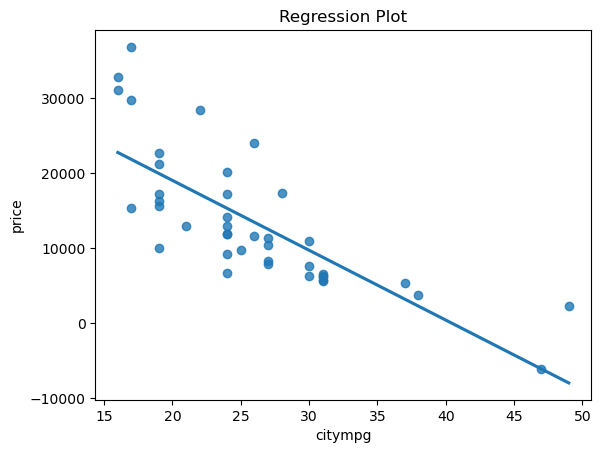

In [28]:
sys.regplot(x=x_test.citympg, y=LR_pred, ci=None)
plt.xlabel('citympg')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()

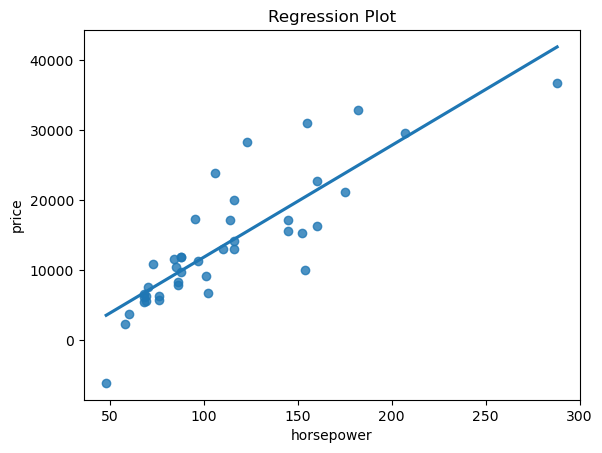

In [30]:
sys.regplot(x=x_test.horsepower, y=LR_pred, ci=None)
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()

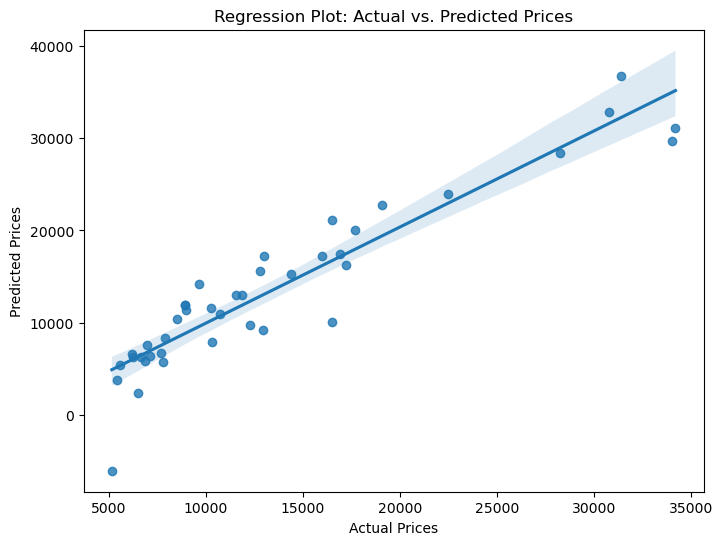

In [32]:
plt.figure(figsize=(8, 6))
sys.regplot(x=y_test, y=LR_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression Plot: Actual vs. Predicted Prices')
plt.show()

In [33]:
## Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

LRmse = mean_squared_error(y_test, LR_pred)
print("Mean Squared Error (MSE):", LRmse)

LRrmse = np.sqrt(LRmse)
print("Root Mean Squared Error (RMSE):", LRrmse)

LRmae = mean_absolute_error(y_test, LR_pred)
print("Mean Absolute Error (MAE):", LRmae)

LRr_squared = r2_score(y_test, LR_pred)
print("R-squared (coefficient of determination):",LRr_squared)

Mean Squared Error (MSE): 10002355.621307772
Root Mean Squared Error (RMSE): 3162.650094668674
Mean Absolute Error (MAE): 2339.044522925048
R-squared (coefficient of determination): 0.8440995620879231


## DecisionTree

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = df[[ 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=42)

# Create the Decision Tree Regressor object
regressor = DecisionTreeRegressor(max_depth=8, random_state=100)

# Fit the model
regressor.fit(x_train, y_train)

# Predict the values of the test data
pred_d = regressor.predict(x_test)

In [35]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
         ...    
56     11845.000
128    37028.000
76      5389.000
144     9233.000
104    17199.000
Name: price, Length: 62, dtype: float64

In [36]:
pred_d

array([36880.        , 23875.        ,  9383.66666667, 11932.        ,
       31600.        ,  6434.44444444,  7957.16666667,  7957.16666667,
        9383.66666667,  7995.        , 24565.        ,  7957.16666667,
       12764.        , 11248.        , 45400.        ,  6693.5       ,
        5472.75      , 12764.        ,  7262.33333333,  9383.66666667,
       10245.        , 14255.66666667,  6434.44444444,  5472.75      ,
        7609.        , 36880.        ,  9989.        , 15801.25      ,
        7122.        , 15801.25      , 31600.        ,  7609.        ,
        9136.5       , 18179.4       ,  7957.        , 31600.        ,
        9383.66666667, 13295.        ,  6575.        , 14255.66666667,
        7957.16666667,  8845.        , 16695.        ,  9136.5       ,
        7122.        ,  7957.16666667,  7609.        ,  7957.16666667,
       17950.        , 12764.        ,  8916.5       , 18179.4       ,
        5472.75      , 10898.        ,  7122.        , 16500.        ,
      

In [37]:
## Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, pred_d)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_d)
r_squared = r2_score(y_test, pred_d)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (coefficient of determination):", r_squared)

Mean Squared Error (MSE): 8648624.418737555
Root Mean Squared Error (RMSE): 2940.854368842081
Mean Absolute Error (MAE): 1973.0539372759856
R-squared (coefficient of determination): 0.8751720865209603


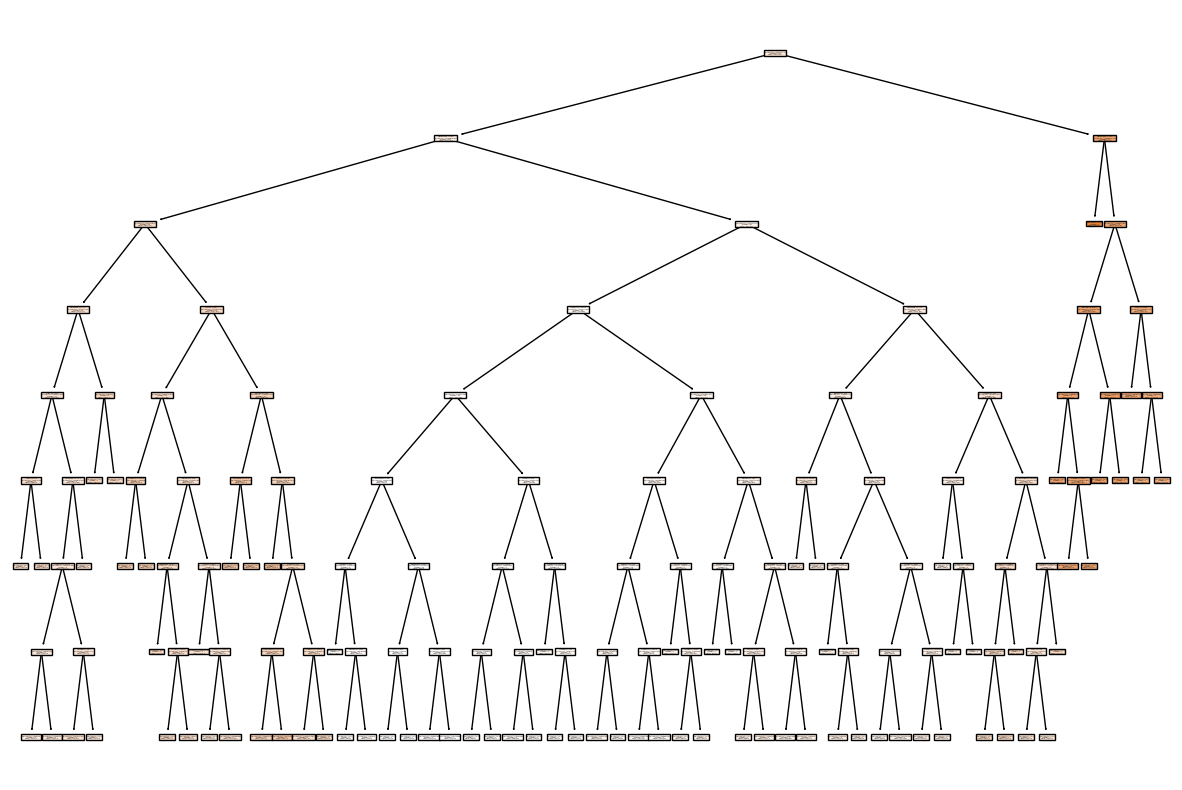

In [38]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=x.columns.tolist())
plt.show()

## RandomForestRegressor

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Features
x = df[['car_ID', 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
# Create the Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=100)

# Fit the model
rf_regressor.fit(x_train, y_train)

# Predict the values of the test data
pred_r = rf_regressor.predict(x_test)

In [40]:
x_train

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
66,67,2,0,104.9,175.0,66.1,54.4,2700,2,134,3.43,3.64,22.0,72,4200,31,39
111,112,2,0,107.9,186.7,68.4,56.7,3075,2,120,3.46,2.19,8.4,95,5000,19,24
153,154,2,0,95.7,169.7,63.6,59.1,2280,2,92,3.05,3.03,9.0,62,4800,31,37
96,97,3,0,94.5,165.3,63.8,54.5,1971,2,97,3.15,3.29,9.4,69,5200,31,37
38,39,2,1,96.5,167.5,65.2,53.3,2289,2,110,3.15,3.58,9.0,86,5800,27,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,1,99.2,178.5,67.9,49.7,3139,4,181,3.43,3.27,9.0,160,5200,19,25
14,15,3,0,103.5,189.0,66.9,55.7,3055,4,164,3.31,3.19,9.0,121,4250,20,25
92,93,3,0,94.5,165.3,63.8,54.5,1938,2,97,3.15,3.29,9.4,69,5200,31,37
179,180,5,1,102.9,183.5,67.7,52.0,3016,4,171,3.27,3.35,9.3,161,5200,19,24


In [41]:
y_train


66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 164, dtype: float64

In [42]:
x_test

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,16,2,0,103.5,189.0,66.9,55.7,3230,4,209,3.62,3.390,8.00,182,5400,16,22
9,10,2,1,99.5,178.2,67.9,52.0,3053,3,131,3.13,3.400,7.00,160,5500,16,22
100,101,2,0,97.2,173.4,65.2,54.7,2302,2,120,3.33,3.470,8.50,97,5200,27,34
132,133,5,1,99.1,186.6,66.5,56.1,2658,2,121,3.54,3.070,9.31,110,5250,21,28
68,69,1,0,110.0,190.9,70.3,58.7,3750,3,183,3.58,3.640,21.50,123,4350,22,25
95,96,3,1,94.5,165.6,63.8,53.3,2028,2,97,3.15,3.290,9.40,69,5200,31,37
159,160,2,0,95.7,166.3,64.4,52.8,2275,2,110,3.27,3.350,22.50,56,4500,38,47
162,163,2,0,95.7,166.3,64.4,52.8,2140,2,98,3.19,3.030,9.00,70,4800,28,34
147,148,2,0,97.0,173.5,65.4,53.0,2455,2,108,3.62,2.640,9.00,94,5200,25,31
182,183,4,1,97.3,171.7,65.5,55.7,2261,2,97,3.01,3.400,23.00,52,4800,37,46


In [43]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
95      7799.000
159     7788.000
162     9258.000
147    10198.000
182     7775.000
191    13295.000
164     8238.000
65     18280.000
175     9988.000
73     40960.000
152     6488.000
18      5151.000
82     12629.000
86      8189.000
143     9960.000
60      8495.000
101    13499.000
98      8249.000
30      6479.000
25      6692.000
16     41315.000
168     9639.000
195    13415.000
97      7999.000
194    12940.000
67     25552.000
120     6229.000
154     7898.000
202    21485.000
79      7689.000
69     28176.000
145    11259.000
55     10945.000
45      8916.500
84     14489.000
146     7463.000
Name: price, dtype: float64

In [44]:
pred_r

array([36467.935, 18985.48 ,  8921.98 , 12987.95 , 28021.23 ,  7161.43 ,
        7972.26 ,  8037.35 ,  9311.03 ,  8132.5  , 14230.67 ,  8066.625,
       13713.03 , 10790.05 , 40517.055,  6623.565,  6012.74 , 13819.37 ,
        8522.65 ,  8801.15 ,  9974.34 , 15003.75 ,  7195.96 ,  6109.13 ,
        6768.45 , 36257.755,  9191.59 , 16724.65 ,  7361.94 , 16513.72 ,
       28094.57 ,  6700.17 ,  7814.02 , 19733.5  ,  8101.685, 28257.705,
        9809.03 , 12345.81 ,  7711.485, 14608.93 ,  8341.45 ])

In [45]:
## Evaluation

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test,pred_r)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_r)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred_r)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 3329752.319301683
Root Mean Squared Error (RMSE): 1824.7608937342127
Mean Absolute Error (MAE): 1234.5961707317074
R-squared (coefficient of determination): 0.9578213488216218


## SVM

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features
x = df[['car_ID', 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Make predictions with the Gradient Boosting model
gb_predictions = gb_regressor.predict(x_test)

# Now, use the predictions as input features for the SVM
x_combined = np.column_stack((x_test, gb_predictions))

# Create the Support Vector Machine Regressor (SVM)
svm_regressor = SVR(kernel='linear', C=1.0)

# Fit the SVM model
svm_regressor.fit(x_combined, y_test)

# Predict the values of the test data using the SVM
pred_s = svm_regressor.predict(x_combined)

In [47]:
pred_s

array([32702.9566783 , 16523.69343394,  8905.68034157, 11929.77542285,
       27416.94310739,  7251.13918516,  7721.74568124,  7684.68413715,
        8635.77912059,  7682.31815388, 13297.31652331,  7508.74837121,
       15426.81647563, 10714.64997404, 41017.62116506,  6755.6969881 ,
        5790.4531739 , 12648.749904  ,  8206.48583144,  8542.79013842,
        9796.9125294 , 13753.92638915,  7274.49195502,  6462.20658893,
        6712.85541626, 32916.44315734, 10209.55163569, 14936.08854574,
        7288.894424  , 15196.4926548 , 28303.76762631,  6901.82994508,
        6721.65498296, 18327.56205001,  8268.11558865, 28113.26185557,
        9237.83487579, 10947.99654692,  7700.8943625 , 13151.2593761 ,
        7751.84393209])

In [48]:
## Evaluation

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test,pred_s)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_s)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred_s)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 3225038.4213108444
Root Mean Squared Error (RMSE): 1795.8391969524566
Mean Absolute Error (MAE): 1090.1929682120958
R-squared (coefficient of determination): 0.9591477811064743


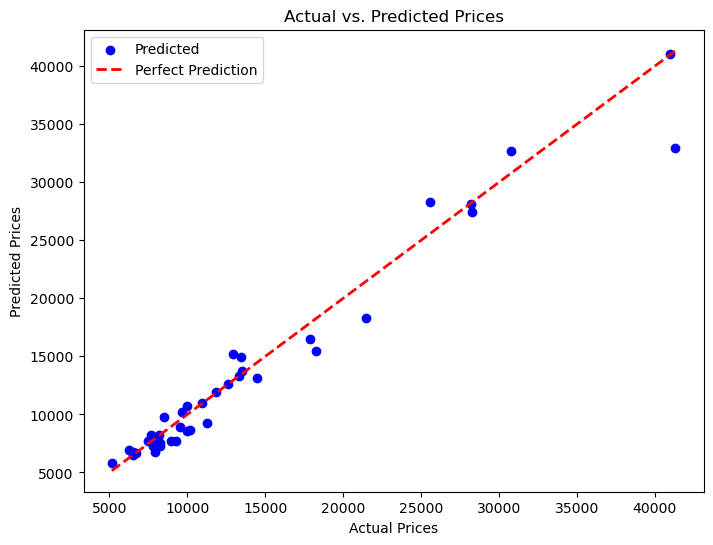

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_s, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()